# 05. DheerajKumar97/Employee-Salary-Prediction----python--ML

## Exploratory Data Analysis - train.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 30
df = pd.read_csv("05_train.csv")

In [2]:
# First 5 rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Last 5 rows of the dataset
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
# All columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# Get statistical info about numerical columns (except UserID)
df.drop('User_ID',axis=1).describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Column Analysis

In [6]:
# Get the counts of gender
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [7]:
# Get the counts of age ranges
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [8]:
# Get the counts of occupations in descending order
print("As seen below, there are {} different occupations.".format(df['Occupation'].nunique()))
df['Occupation'].value_counts()

As seen below, there are 21 different occupations.


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [9]:
# Get the counts of city categories
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [10]:
# Get the counts of current city years the person is staying
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [11]:
# Get the counts of marital status (0 should mean 'single', 1 should mean 'married')
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [12]:
# Get the counts of 1st Product Categories is descending order
print("{} different 1st Product Categories exist".format(df['Product_Category_1'].nunique()))
print("{} null values in 1st Product Category".format(df['Product_Category_1'].isnull().sum()))
df['Product_Category_1'].value_counts()

20 different 1st Product Categories exist
0 null values in 1st Product Category


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [13]:
# Get the counts of 2nd Product Categories in descending order
print("{} different 2nd Product Categories exist".format(df['Product_Category_2'].nunique()))
print("{} null values in 2nd Product Category".format(df['Product_Category_2'].isnull().sum(), ))
df['Product_Category_2'].value_counts()

17 different 2nd Product Categories exist
173638 null values in 2nd Product Category


8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [14]:
print("{} different 3rd Product Categories exist".format(df['Product_Category_3'].nunique()))
print("{} null values in 3rd Product Category".format(df['Product_Category_3'].isnull().sum()))
df['Product_Category_3'].value_counts()

15 different 3rd Product Categories exist
383247 null values in 3rd Product Category


16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

## Visualizations

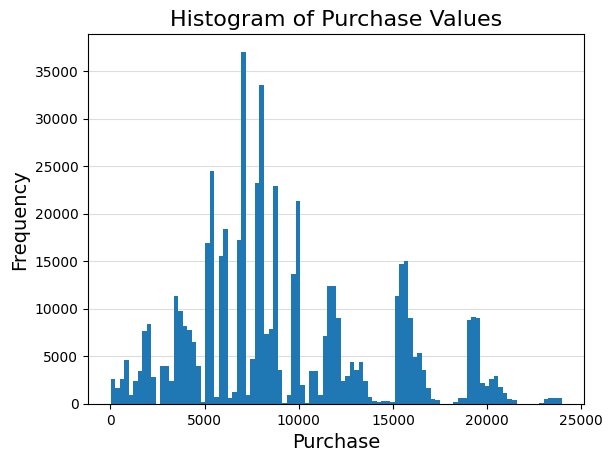

In [15]:
plt.hist(df['Purchase'], bins=100, zorder=2)
plt.title('Histogram of Purchase Values', fontsize=16)
plt.grid(axis='y', color='#dddddd', zorder=1)
plt.xlabel('Purchase', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

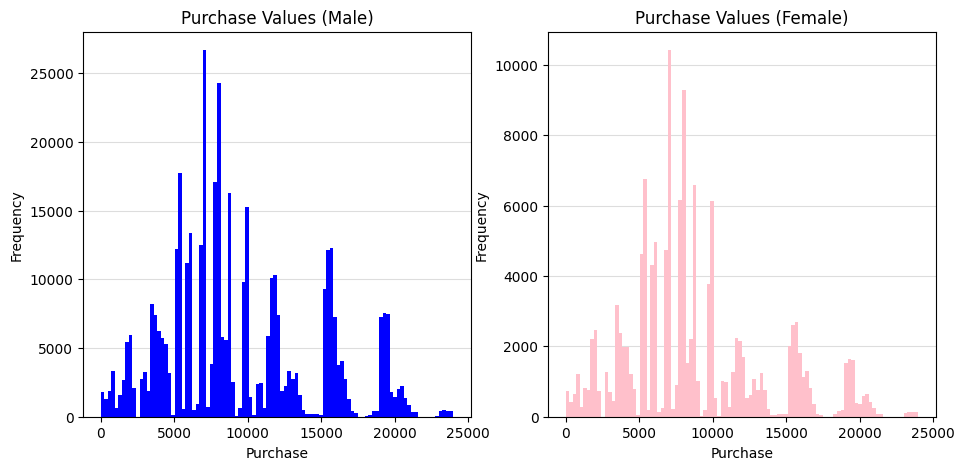

In [16]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.hist(df[df['Gender'] == 'M']['Purchase'], color='blue', bins=100, zorder=2)
plt.title('Purchase Values (Male)')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(axis='y', color='#dddddd', zorder=1)
plt.subplot(1,2,2)
plt.hist(df[df['Gender'] == 'F']['Purchase'], color='pink', bins=100, zorder=2)
plt.title('Purchase Values (Female)')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(axis='y', color='#dddddd', zorder=1)
plt.show()

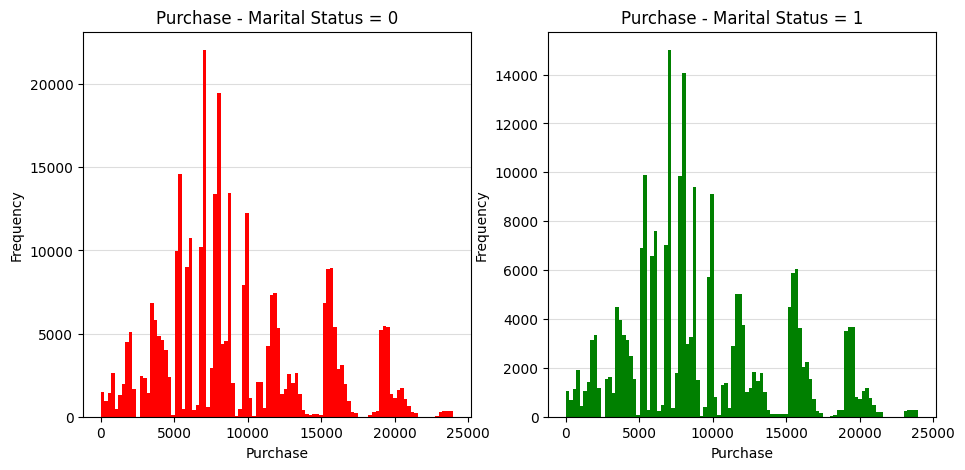

In [17]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.hist(df[df['Marital_Status'] == 0]['Purchase'], color='red', bins=100, zorder=2)
plt.title('Purchase - Marital Status = 0')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(axis='y', color='#dddddd', zorder=1)
plt.subplot(1,2,2)
plt.hist(df[df['Marital_Status'] == 1]['Purchase'], color='green', bins=100, zorder=2)
plt.title('Purchase - Marital Status = 1')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(axis='y', color='#dddddd', zorder=1)
plt.show()

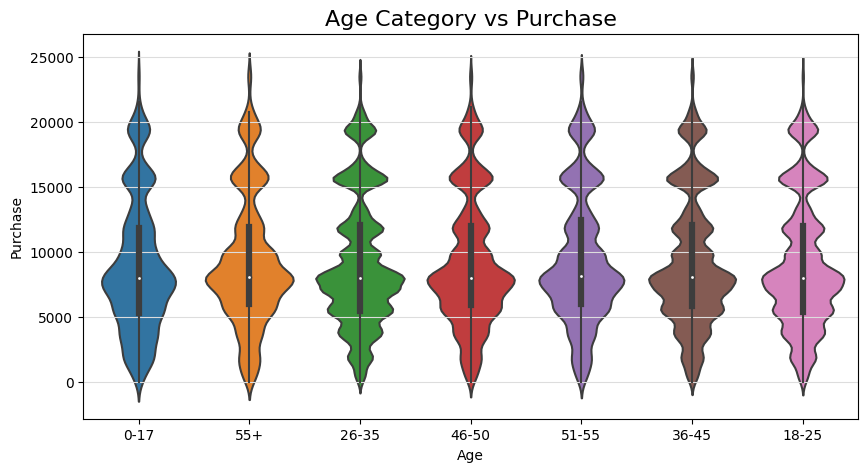

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Age', y='Purchase', data=df)
plt.title('Age Category vs Purchase', fontsize=16)
plt.grid(color='#dddddd', axis='y')
plt.show()

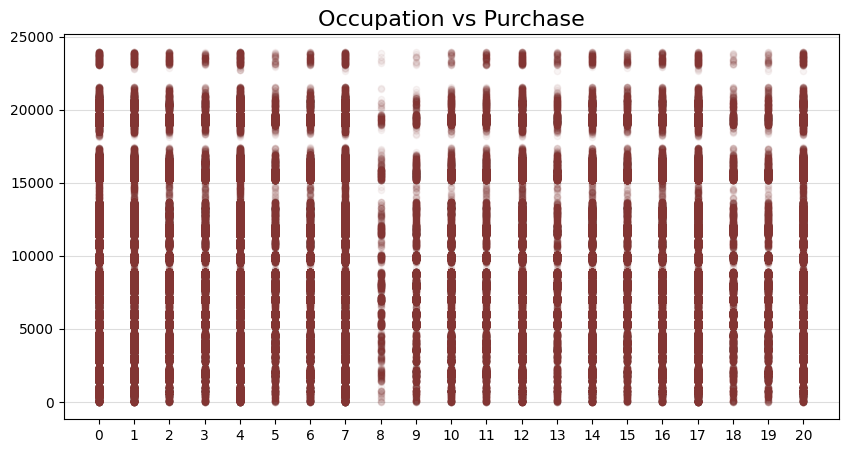

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df['Occupation'], df['Purchase'], alpha=0.05, s=20, color='#823533', zorder=2)
plt.title('Occupation vs Purchase', fontsize=16)
plt.xticks(range(21))
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

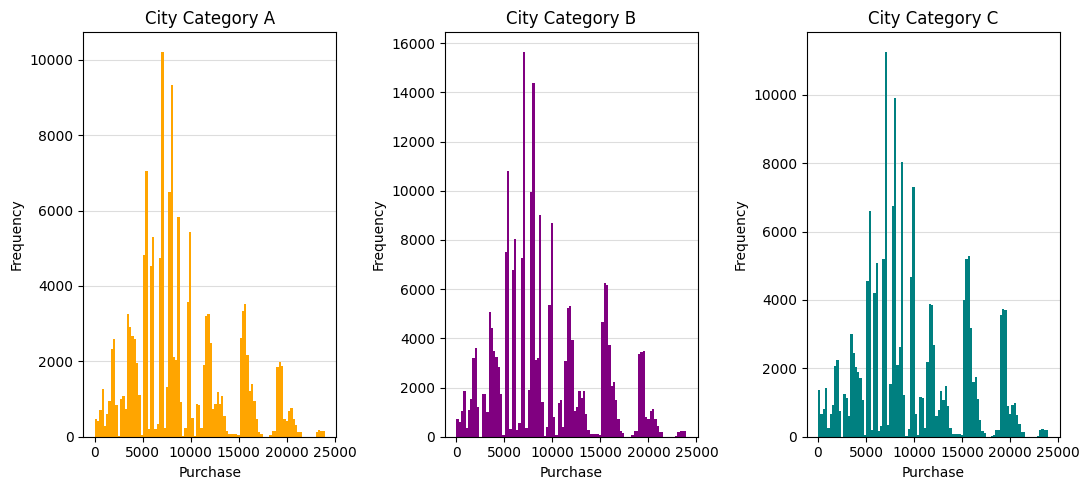

In [20]:
plt.figure(figsize=(11,5))
plt.subplot(1,3,1)
plt.hist(df[df['City_Category'] == 'A']['Purchase'], bins=100, color='orange', zorder=2)
plt.title('City Category A')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.subplot(1,3,2)
plt.hist(df[df['City_Category'] == 'B']['Purchase'], bins=100, color='purple', zorder=2)
plt.title('City Category B')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.subplot(1,3,3)
plt.hist(df[df['City_Category'] == 'C']['Purchase'], bins=100, color='teal', zorder=2)
plt.title('City Category C')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.tight_layout()
plt.show()

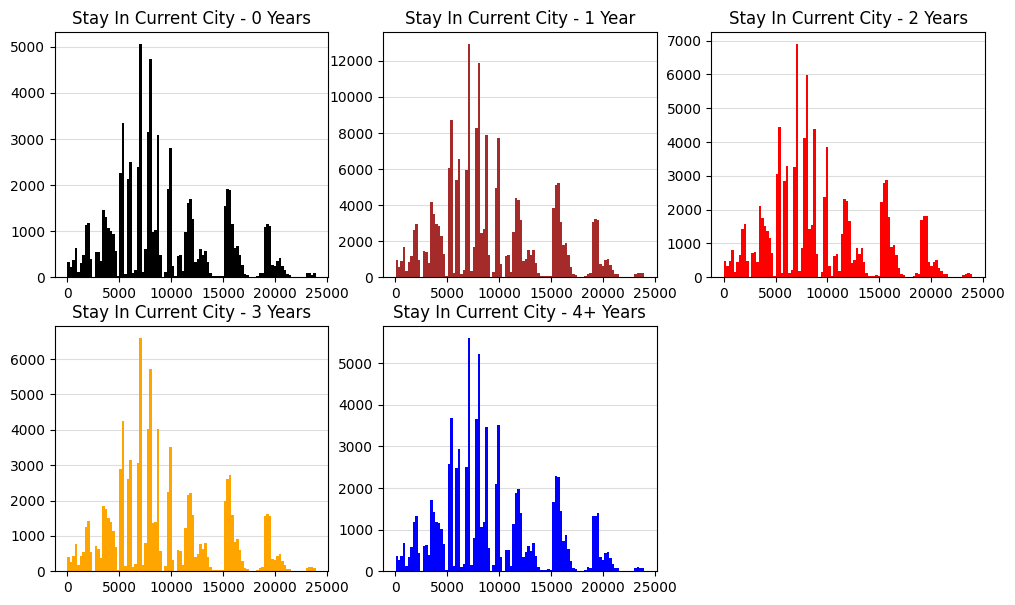

In [21]:
plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
plt.hist(df[df['Stay_In_Current_City_Years'] == '0']['Purchase'], bins=100, color='black', zorder=2)
plt.title("Stay In Current City - 0 Years")
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.subplot(2,3,2)
plt.hist(df[df['Stay_In_Current_City_Years'] == '1']['Purchase'], bins=100, color='brown', zorder=2)
plt.title("Stay In Current City - 1 Year")
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.subplot(2,3,3)
plt.hist(df[df['Stay_In_Current_City_Years'] == '2']['Purchase'], bins=100, color='red', zorder=2)
plt.title("Stay In Current City - 2 Years")
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.subplot(2,3,4)
plt.hist(df[df['Stay_In_Current_City_Years'] == '3']['Purchase'], bins=100, color='orange', zorder=2)
plt.title("Stay In Current City - 3 Years")
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.subplot(2,3,5)
plt.hist(df[df['Stay_In_Current_City_Years'] == '4+']['Purchase'], bins=100, color='blue', zorder=2)
plt.title("Stay In Current City - 4+ Years")
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

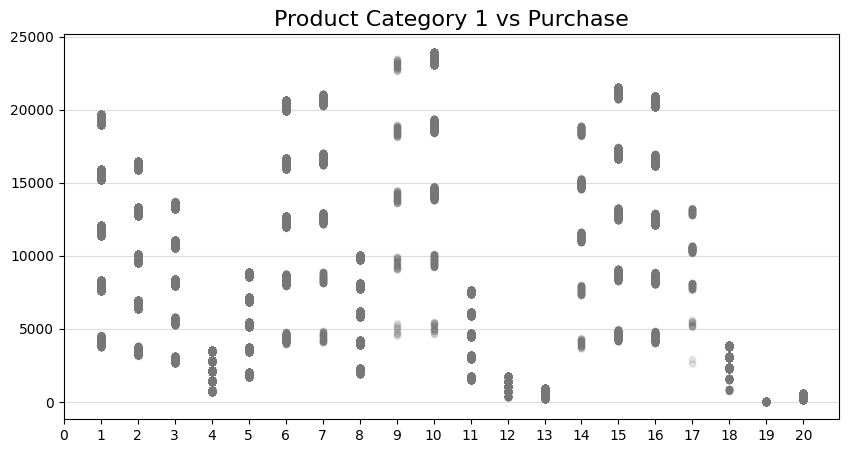

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(df['Product_Category_1'], df['Purchase'], alpha=0.05, s=20, color='#777777', zorder=2)
plt.title('Product Category 1 vs Purchase', fontsize=16)
plt.xticks(range(21))
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

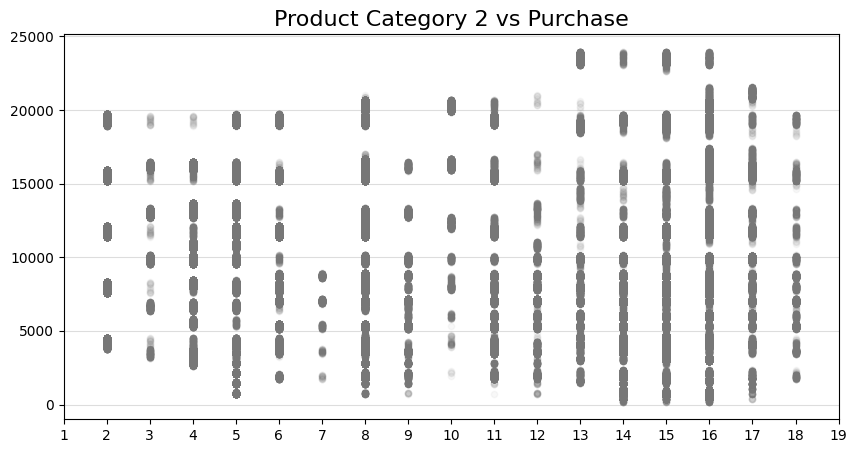

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df['Product_Category_2'], df['Purchase'], alpha=0.05, s=20, color='#777777', zorder=2)
plt.title('Product Category 2 vs Purchase', fontsize=16)
plt.xticks(range(1,20))
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

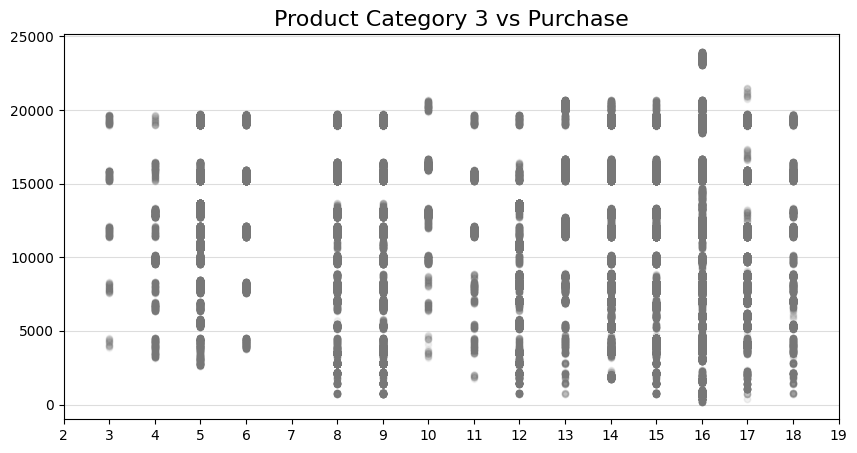

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(df['Product_Category_3'], df['Purchase'], alpha=0.05, s=20, color='#777777', zorder=2)
plt.title('Product Category 3 vs Purchase', fontsize=16)
plt.xticks(range(2,20))
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()